# Report

Surya Kasturi <br>
Junior Research Assistant (intern), June - July 2017 <br>
Realtime Data Analytics Team <br>
Advanced Digital Sciences Center <br>


## Contents
1. Introduction
2. Exploratory analysis
3. Prediction and forecasting
4. Finding abnormalities
5. Dashboard web interface
6. Conclusion and further direction

## 1. Introduction

### 1.1 Chiller Plants
Chiller plants are typically used for large scale air conditioning in places such as office buildings and data centers. These systems often represent a major share of the total power consumption. According to the US EPA 2007 report, the cooling costs have doubled over five years. Thus, it is a potential business objective to optimize these chiller plants and manage them effectively. In this project, sensor data of Kaer's water-based chiller plants are analyzed. 

A chiller plant consists of Cooling Tower (CT), Chiller (CH), Water Pumps (WP), Air handling units. The architecture of each chiller plant varies by the number and arrangement of these units. The two chiller plants at Insead and North Point of varying architecture are studied in this project.

### 1.2 Scope

The scope of this project includes the following broad themes. This report elucidates each of these in the coming sections

1. Exploratory analysis to understand chiller plants and uncover behavioral patterns
2. Forecasting condenser water supply temperature, a module of the chiller plant modeling
3. Finding abnormalities in chiller plants behavior
4. Development of a web interface for parameters visualization and summary statistics


### 1.3 Data Format

The sensors at Kaer's chiller plants record structured time series data into a MySQL database every 1 minute. The recorded parameters may vary depending on chiller plant's design. For example, some plants have multiple cooling towers with one or more operating at any time. Following are the general parameters recorded by these chiller plants as floating numbers.

- Timestamp := Time (upto the precision of a minute with no time zone) is recored
- LoadSys := Cooling Load
- EffSys := Chiller Plant's efficiency
- SysTotPower := System total power
- RH := Relative humidity
- DB := Dry bulb temperature
- WetBulb := Wet bulb temperature
- CWSHDR := Condenser Water Supply (CWS) Temperature
- CWRHDR := Condenser Water Return (CWR) Temperature
- CHWHDR := Chilled Water Temperature
- CHWRHDR := Chilled Water Return Temperature
- CHWS := Chilled Water Supply
- CWFHDR := 
- CHKW :=
- CTKW := Cooling Tower power  
- HYSYS := Heat Balance

## 2. Exploratory Analysis 
**Note: Talk about heteroskedasitcity**

This section describes the highlights of the conducted exploratory analysis. The goals of this analysis are (a) to understand chiller plants and get intuitive idea of the sensor data (b) leverage the uncovered behavioral patterns in forecast modeling and finding abnormalities.

The data from North Point and Insead chiller plants have been used in exploratory analysis. The data are from the period August 2016 to July 2017. Some analysis has been done on subsets of this data and unless mentioned specificially about time period of subsets, the analysis represents the whole dataset.

### 2.1 Unknown and Incorrect values

The database does not always represent correct data values. Empirical observations show that sensors sometimes do not record values of certain parameters or record incorrect values. The null (empty) values of parameters represent that data is not recorded. The negative values may represent respective chiller plant unit being switched off or not working. The chiller plant at North Point contains relatively more number of null values. 

The below image contains two tables. The left table shows the percentage of negative values and the right image shows the percentage of (non-null) values in the Insead Chiller Plant

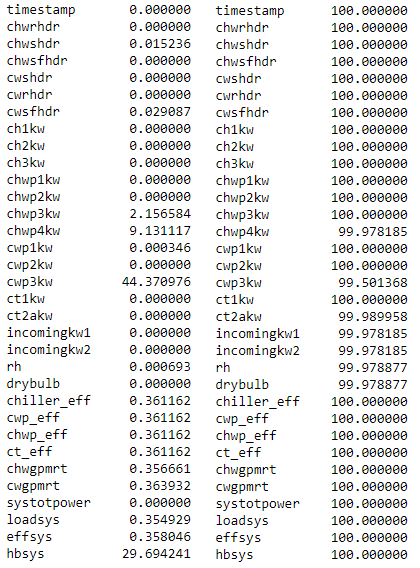

The null and negative values are observed to occur at irregular intervals. For some parameters such as Cooling Tower Power (CTKW) where the practical knowledge indicates the practical lower thresholds, the negative values are replaced with zeros. The null values are replaced with a moving average of approx. 10 minutes window length.

### 2.2 Normalization and smoothing

The data are normalized to have 0.1 and 1 as lower and upper boundaries respectively for modeling. In some experiments the data are smoothed and/or downsampled to be able to capture just the high level information, ignore any unknown noise. The smoothing is done by using a moving average of the time series data. It is explicity mentioned in coming sections where this type of data preprocessing is done.

### 2.3 A sneak peek at the data

This section is intented to give a high level view of the data to help in understanding coming sections better.

The below image briefly describes some parameters of Jan-July 2017 data of Insead Chiller Plant. The parameters shown in the image are of major interest in forecast modeling.

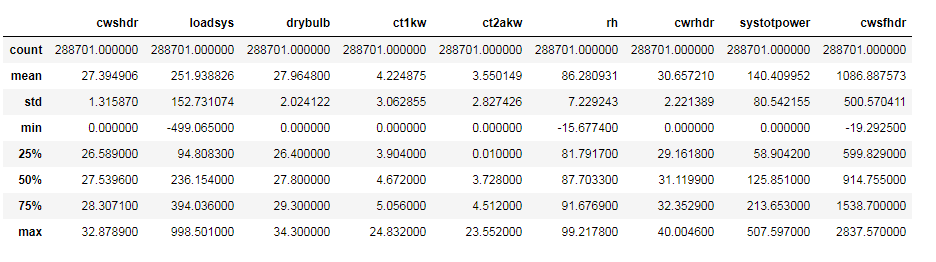

The below image show one day data of the Condenser Water Supply Temperature (CWSHDR) of Insead Chiller Plant. The gradual rise in temperature as the day progresses followed by gradual drop is evident in this image. Note the sudden temperature drop at the beginning. Considering the entire dataset, there are two possible explanations to these sharp drops (a) they represent null values (b) the chiller plant unit is temporarily not in use/working.

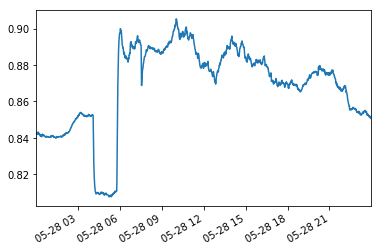

### 2.4 Seasons and Trends

The chiller plant at Insead (Insead Business School) is a usual commercial building. This section discusses seasons and trends in Condenser Water Supply Temperature (CWSHDR) of this plant. Data during the period Jan 01 - Jan 15 2017 are used for demonstration. CWSHDR data are decomposed into seasons and trends using additive decomposition. The following three plots show trends, seasons and residuals of the data respectively. 

$CWSHDR (t) = Trend (t) + Seasons (t) + Residual (t)$

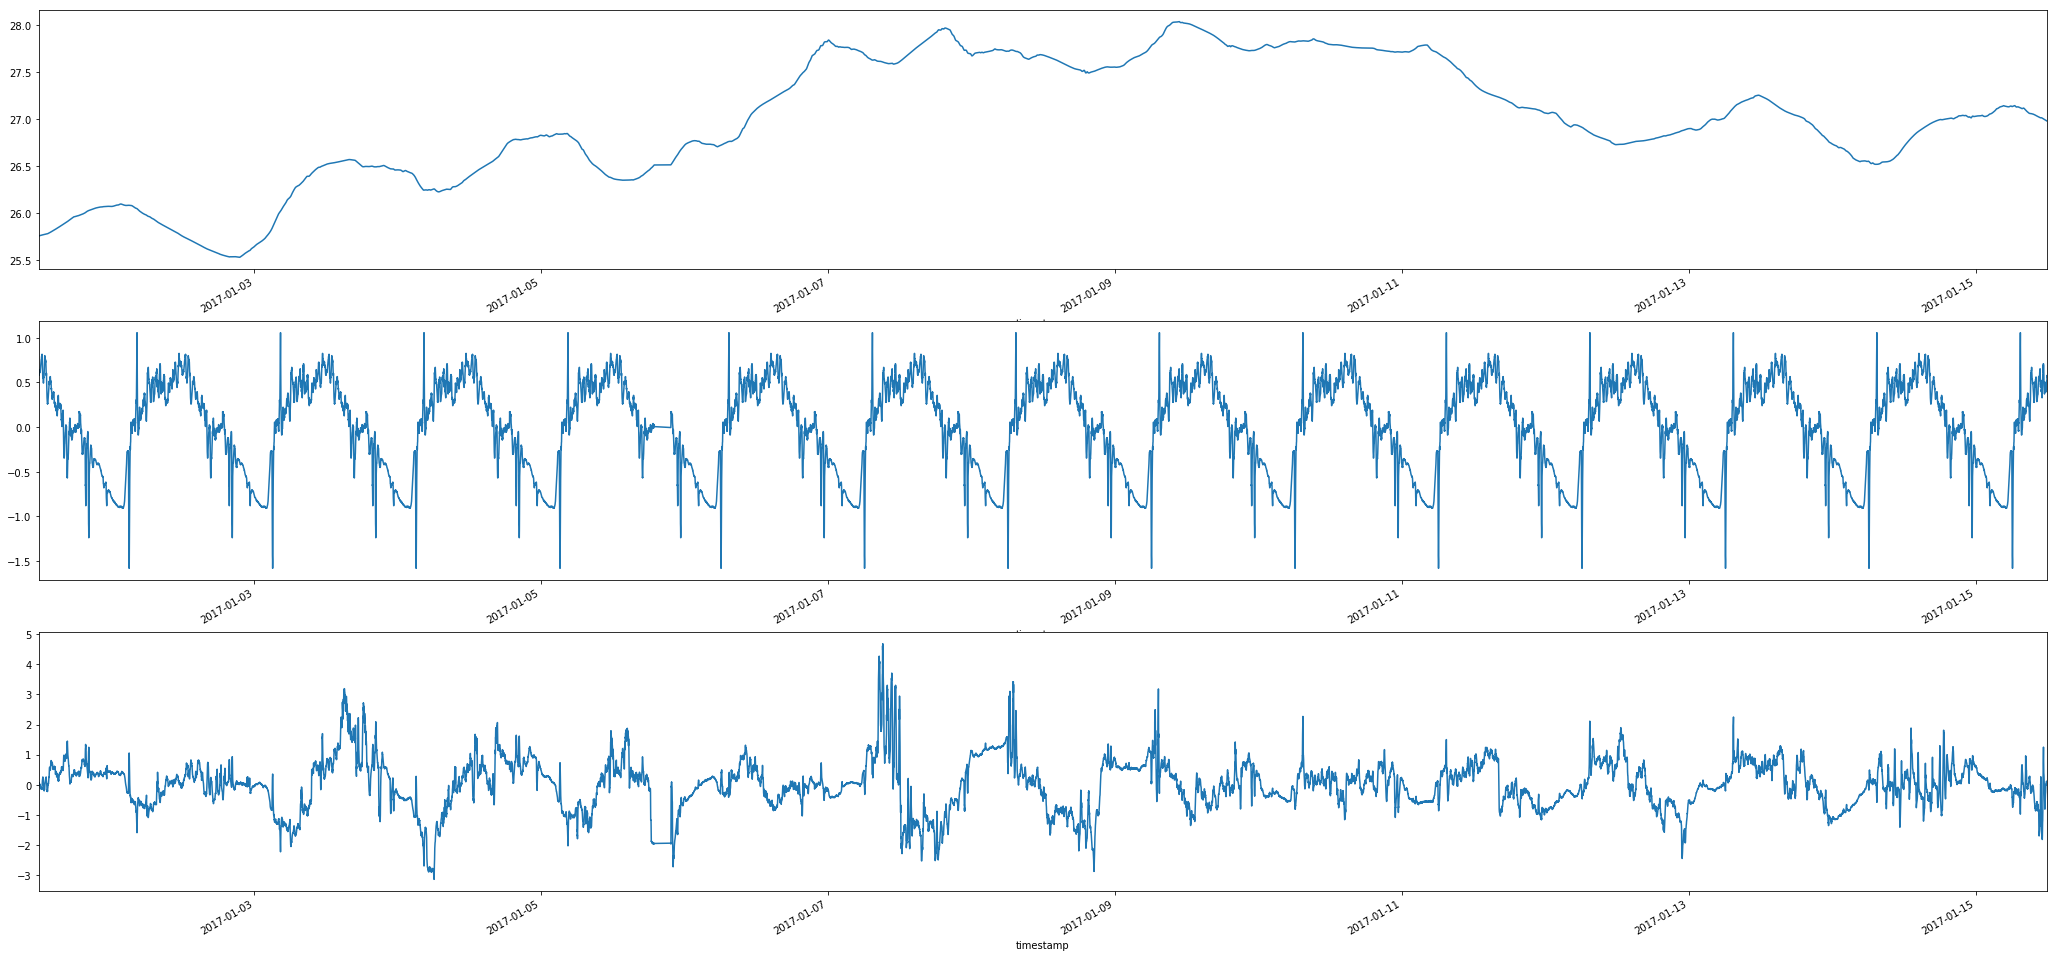

The first plot representing trends in this demonstration or in the entire dataset do not show any particular behavior. Considering a short term data, it appears to be linear.

The second plot representing seasons show that there is a gradual rise followed by gradual drop in temperature everyday. This may represent the business hours of the Insead building. Also, there is sharp drop and rise of temperature everyday. This is more clearly evident in the image shown in section 2.3. 

The third plot representing the residual values do not visually provide any intuitive information. However, the pearson correlation matrix below hints at a strong relationship among a few residual parameter pairs. The reduction in mean absolute percent error (MAPE) of forecast models by using some these parameters corroborate this relationship. The forecast models are described in further sections.

1. CWSHDR (condenser water supply temperature) and LoadSys (loadsys)
2. CWSHDR and CWRHDR (condenser water return temperature)
3. CWSHDR and SysTotPower (System Total Power)
4. LoadSys and CWRHDR
5. LoadSys and SysTotPower
6. DryBulb (Dry bulb) and Rh (relative humidity)

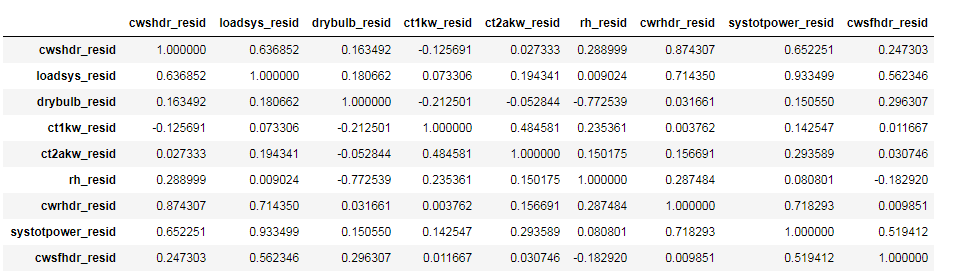

### 2.5 Clusters

This section gives a brief account of a clustering analysis in progress. This thought experiment is intended to answer (a) whether the clusters highlight any real-world behavior (b) whether the data used in training forecast models is balanced.

The entire Insead data which comprises approx. 3 years duration at 1 minute interval is split into sequences. Each sequence represents a period of 1 day and is downsampled from 1 minute to 1 hour interval. Dynamic Time Warping (DTW) distance is used to compare any two sequences. Hierarchical complete agglomerative clustering is performed to cluster these sequences. 

The following image shows the heatmap of the sequences. Each number along axes represent a sequence ID. The value between two sequences represent DTW distance. DTW has a lower bound of 0 (meaning perfect match).

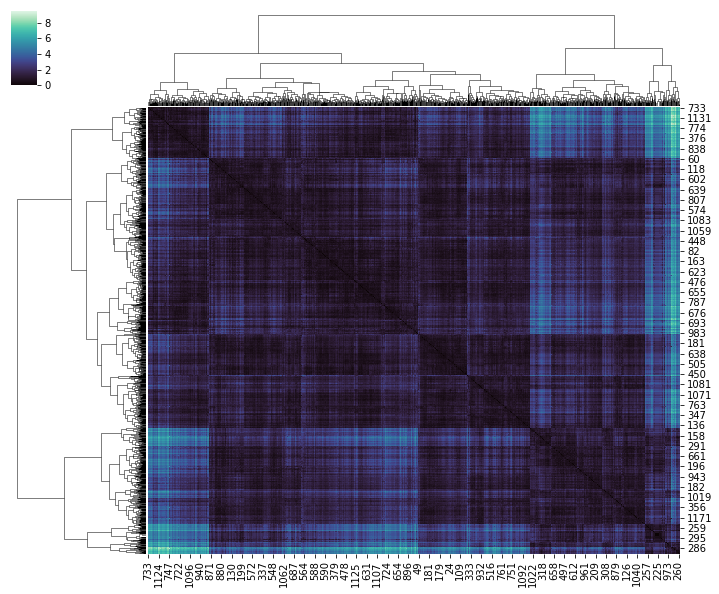



## 3. Prediction & Forecasting

This section discusses about the prediction and forecasting modeling of Condenser Water Supply Temperature CWSHDR. Although forecasting is the main agenda, prediction models could help know more about the relationships between the parameters.

### 3.1 Prediction

This section continues the analysis in Section 2.3. A prediction model is designed using linear regression to predict Condenser Water Supply Temperature (CWSHDR) using Load Sys, Dry Bulb (Dry Bulb temperature), Relative Humidity (Rh), Condenser Water Return Temperature (CWRHDR), System total Power (SysTotPower). The prediction model is trained on data of a day picked at random and validated its following day. This way, the emphasis on seasonal patterns is reduced to capture actual relationships. 

The below are the scatter plots of a day's data picked at random. This is to give visual intuition of the data. The plots presented here and several other randomly picked days show that the relationships are not perfectly linear. Each color in these plots represent an hour of the day. It's interesting to observe that data points within an hour show better linear behavior.

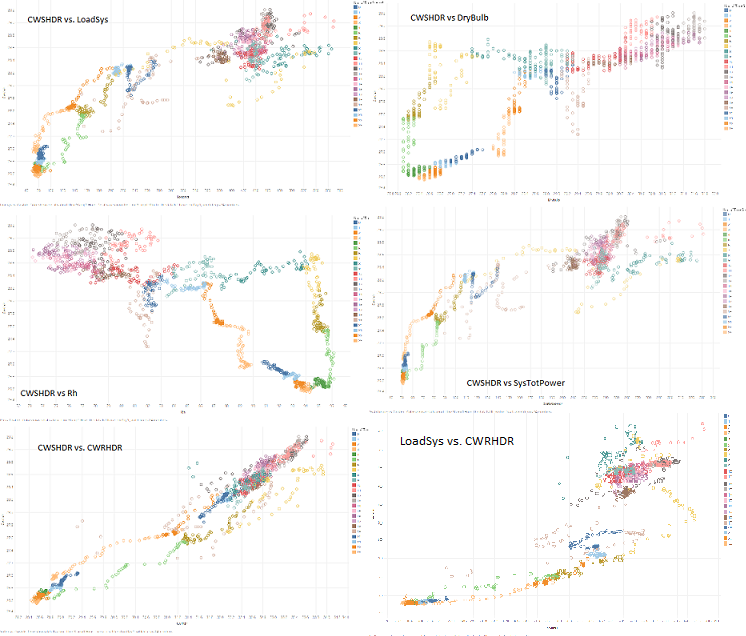


The the linear model with Load Sys, Dry Bulb, Relative Humidity, CWRHDR demonstrate 0.3% mean absolute percentage error (MAPE). Regression testing performed on 30 consecutive days data show MAPE 1% at worst case.

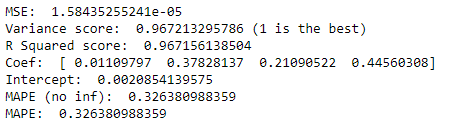

The following demonstrates the prediction output of the linear model.

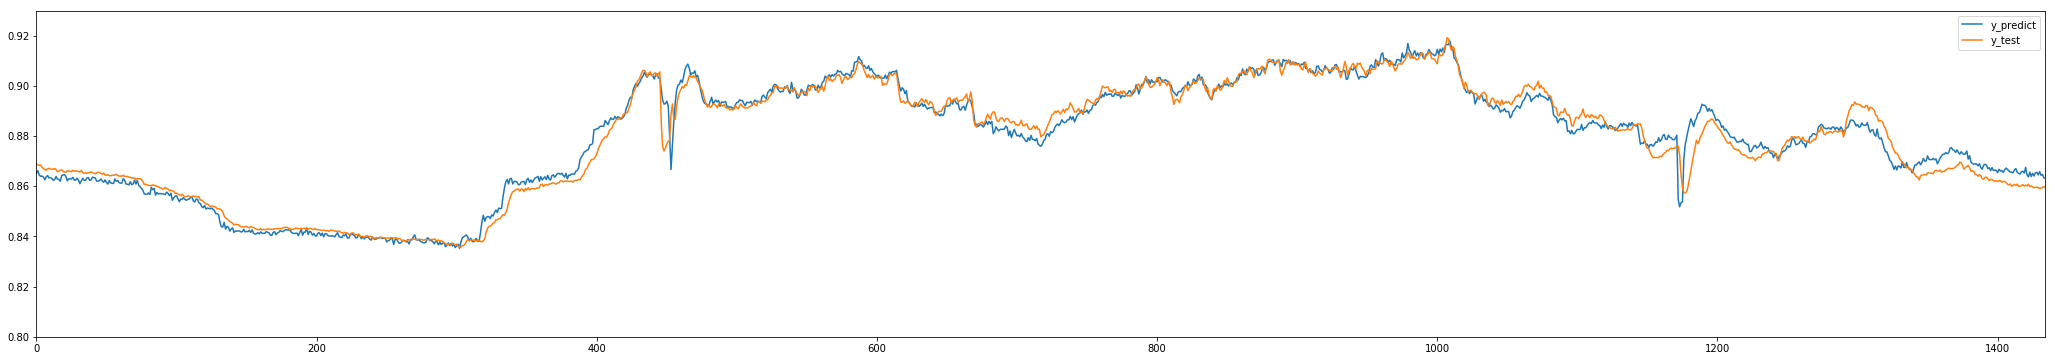

**Note:** Assuming the seasonal patterns have not altered during the entire dataset, a subset of data representing a particular hour across many days could explain variance behaviors. (this is not yet experimented!)

For example, assume everyday at 10am, the Insead building characterstics (such as number of people), chiller plant's manual operating charactersitcs remain same during a period of 30 consecutive days. By keep the building and chiller plant's operational characterstics constant, the behavioral characterstics of the plant can be explored. 

### 3.2 Forecasting

This section discusses the models to forecast Condenser Water Supply Temperature. Particularly, Long Short Term Memory models (a variant of RNN) are explored.